# Temperature NN

### Imports

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
from generate_temp_nn_data import GenerateData

### Generate Training Data and Test Data

In [2]:
generate = GenerateData(1000,500,0,7)

--- 0.16530203819274902 seconds ---


#### Example Images

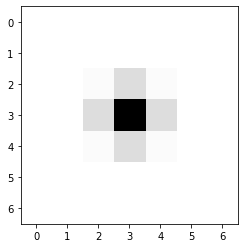

In [35]:
# T = 0.5
for i in range(len(generate.y_train)):
    if generate.y_train[i]==0:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

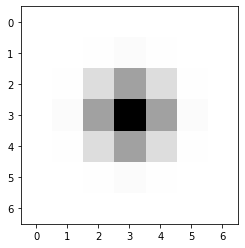

In [36]:
# T = 1
for i in range(len(generate.y_train)):
    if generate.y_train[i]==1:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

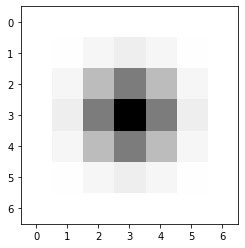

In [37]:
# T = 1.5
for i in range(len(generate.y_train)):
    if generate.y_train[i]==2:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

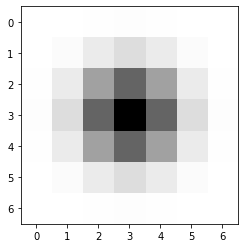

In [38]:
# T = 2
for i in range(len(generate.y_train)):
    if generate.y_train[i]==3:
        plt.imshow(generate.x_train[i],cmap=plt.cm.binary)
        break

In [39]:
print(generate.x_train[0])

[[4.096141568885476e-06, 0.00011482150397387345, 0.0008484225342265391, 0.0016525014511109062, 0.0008484225342265391, 0.00011482150397387345, 4.096141568885476e-06], [0.00011482150397387343, 0.003218633329220962, 0.023782662231501606, 0.046322300815201035, 0.023782662231501606, 0.003218633329220962, 0.00011482150397387343], [0.0008484225342265391, 0.023782662231501606, 0.1757314254104845, 0.3422780793550613, 0.1757314254104845, 0.023782662231501606, 0.0008484225342265391], [0.0016525014511109062, 0.046322300815201035, 0.3422780793550613, 0.6666666666666666, 0.3422780793550613, 0.046322300815201035, 0.0016525014511109062], [0.0008484225342265391, 0.023782662231501606, 0.1757314254104845, 0.3422780793550613, 0.1757314254104845, 0.023782662231501606, 0.0008484225342265391], [0.00011482150397387343, 0.003218633329220962, 0.023782662231501606, 0.046322300815201035, 0.023782662231501606, 0.003218633329220962, 0.00011482150397387343], [4.096141568885476e-06, 0.00011482150397387345, 0.00084842

### Compile Basic Feed Forward NN

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

optim = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [40]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(kernel_size=3,filters=12,use_bias=False,padding='same'))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=24,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation("relu"))


model.add(tf.keras.layers.Conv2D(kernel_size=6,filters=32,use_bias=False,padding='same',strides=2))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200,use_bias=False))
model.add(tf.keras.layers.BatchNormalization(center=True,scale=False))
model.add(tf.keras.layers.Activation("relu"))

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer,loss="sparse_categorical_crossentropy",metrics=["accuracy"])

x_train = np.asarray(generate.x_train)
x_test = np.asarray(generate.x_test)

x_test = x_test.reshape((x_test.shape[0], 7, 7, 1)).tolist()
x_train = x_train.reshape((x_train.shape[0], 7, 7, 1)).tolist()

### Train

In [ ]:
model.fit(x_train,generate.y_train,epochs=32)

Epoch 1/32
32/32 [==============================] - 0s 7ms/step - loss: 0.0513 - accuracy: 0.9820
Epoch 2/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0060 - accuracy: 0.9990
Epoch 3/32
32/32 [==============================] - 0s 9ms/step - loss: 0.1551 - accuracy: 0.9760
Epoch 4/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0717 - accuracy: 0.9690
Epoch 5/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0943 - accuracy: 0.9660
Epoch 6/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 7/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0186 - accuracy: 0.9970
Epoch 8/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0499 - accuracy: 0.9830
Epoch 9/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0487 - accuracy: 0.9790
Epoch 10/32
32/32 [==============================] - 0s 8ms/step - loss: 0.0109 - accuracy: 0.9980
Epoch 11/32
32/32 [

### Evaluate Loss and Accuracy on Test Set

In [46]:
val_loss, val_acc = model.evaluate(x_train,generate.y_train)
print("loss: ",val_loss,"\n","accuracy: ",val_acc)

32/32 [==============================] - 0s 4ms/step - loss: 0.7346 - accuracy: 0.7500
loss:  0.7345924377441406 
 accuracy:  0.7500000596046448


In [6]:
model.save('num_model')
new_model = tf.keras.models.load_model('num_model')
predictions = new_model.predict(generate.x_test)

INFO:tensorflow:Assets written to: num_model/assets


INFO:tensorflow:Assets written to: num_model/assets


16/16 [==============================] - 0s 3ms/step


2022-07-28 15:40:08.799893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[4.5305024e-11 1.6749684e-14 1.2087232e-12 1.0000000e+00]


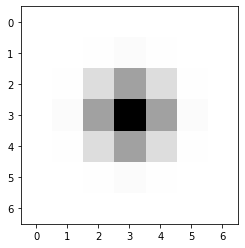

In [23]:
i=5
print(predictions[i])
plt.imshow(generate.x_test[i],cmap=plt.cm.binary)

In [ ]:
df = pd.read_csv("temp_nn_data.csv")